In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sn
import os
import cv2
from random import randint
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models, optimizers
from keras.models import Model
from keras.models import load_model
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
from keras.applications import VGG16
from keras.applications import VGG19
from keras import backend as K
from sklearn.model_selection import train_test_split
import warnings
from sklearn.utils import shuffle
import pickle
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [ ]:
with open("/content/drive/My Drive/bee_project/images_1.pickle", "rb") as f:
  images1 = pickle.load(f)

with open("/content/drive/My Drive/bee_project/images_2.pickle", "rb") as f:
  images2 = pickle.load(f)

with open("/content/drive/My Drive/bee_project/labels_1.pickle", "rb") as f:
  labels1 = pickle.load(f)

with open("/content/drive/My Drive/bee_project/labels_2.pickle", "rb") as f:
  labels2 = pickle.load(f)

with open("/content/drive/My Drive/bee_project/images_1_highres.pickle", "rb") as f:
  images1_highres = pickle.load(f)

with open("/content/drive/My Drive/bee_project/images_2_highres.pickle", "rb") as f:
  images2_highres = pickle.load(f)

In [ ]:
long_labels2 = labels2
labels2 = np.array([i[1] for i in labels2])

In [ ]:
rename_simplify = {
    'Apis mellifera':'0',
    'Bombus affinis':'1',
    'Bombus auricomus': '1',
    'Bombus bimaculatus': '1',
    'Bombus citrinus': '1',
    'Bombus fervidus': '1',
    'Bombus fraternus': '1',
    'Bombus griseocollis': '1',
    'Bombus impatiens': '1',
    'Bombus pensylvanicus': '1',
    'Bombus perplexus': '1',
    'Bombus rufocinctus': '1',
    'Bombus vagans': '1'}
binary_labels1 = np.array([int(rename_simplify[i]) for i in labels1])
binary_labels2 = np.array([0 for i in labels2])

# Training on image set 1, which has mixed apis and bombus bees, and testing to see how model does on separate image set 2.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 17300 samples, validate on 3054 samples
Epoch 1/40





17300/17300 [==============================] - 14s 838us/step - loss: 0.6557 - acc: 0.6584 - val_loss: 0.5408 - val_acc: 0.7335
Epoch 2/40
17300/17300 [==============================] - 6s 347us/step - loss: 0.5035 - acc: 0.7583 - val_loss: 0.4484 - val_acc: 0.7888
Epoch 3/40
17300/17300 [==============================] - 6s 337us/step - loss: 0.4187 - acc: 0.8099 - val_loss: 0.6111 - val_acc: 0.7099
Epoch 4/40
17300/17300 [==============================] - 6s 338us/step - loss: 0.3472 - acc: 0.8535 - val_loss: 0.3618 - val_acc: 0.8432
Epoch 5/40
17300/17300 [==============================] - 6s 343us/step - loss: 0.2851 - acc: 0.8826 - val_loss: 0.3928 - val_acc: 0.8324
Epoch 6/40
17300/17300 [============

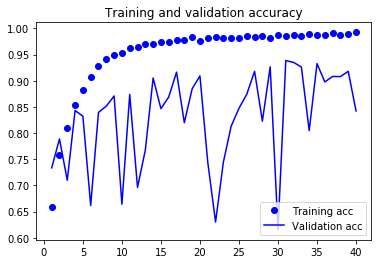

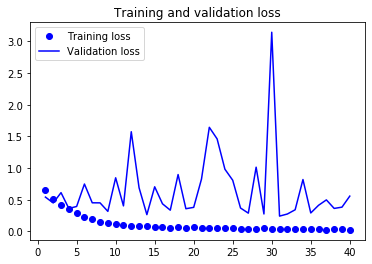

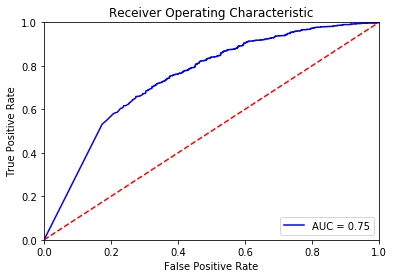

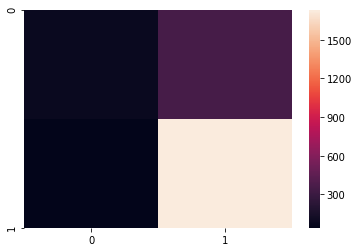

In [ ]:
# training first model with Adam, simple base model
train_images, test_images, train_labels, test_labels = train_test_split(images1, binary_labels1, test_size = 0.15, random_state = 12)
train_index = [i for i in range(len(train_images))]
ros = RandomOverSampler(random_state=1776)
train_index, train_labels = ros.fit_resample(np.array(train_index).reshape(-1,1), train_labels)
train_images = train_images[train_index.reshape(-1)]
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.15, random_state = 12)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])
epochs = 40
history = model.fit(train_images, train_labels, validation_data = (val_images, val_labels), epochs = epochs)
print('test loss and accuracy:', model.evaluate(test_images, test_labels))
print('loss and accuracy on separate data set:', model.evaluate(images2, binary_labels2))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('first_model_low_res_acc.png')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('first_model_low_res_loss.png')
probs = model.predict_proba(test_images)
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(test_labels, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('first_model_low_res_roc.png')
plt.show()
y_pred = model.predict(test_images)
y_pred = np.array([round(i[0]) for i in y_pred])
cm = sklearn.metrics.confusion_matrix(test_labels, y_pred)
snplot = sn.heatmap(cm, annot=False,xticklabels=[0,1],yticklabels=[0,1])
snplot.get_figure().savefig('first_model_low_res_cm.png')

##The very simple starter model was able to achieve a reasonable accuracy of 82% on the test set, with a ROC AUC of 0.75. However it did not generalize well at all to the separate test set.

##Next we use the same model but with higher resolution images to test the effect of resolution on model performance.

Train on 17300 samples, validate on 3054 samples
Epoch 1/40
17300/17300 [==============================] - 8s 467us/step - loss: 0.6329 - acc: 0.6797 - val_loss: 0.5505 - val_acc: 0.7122
Epoch 2/40
17300/17300 [==============================] - 7s 402us/step - loss: 0.4779 - acc: 0.7736 - val_loss: 0.4660 - val_acc: 0.7849
Epoch 3/40
17300/17300 [==============================] - 7s 411us/step - loss: 0.3952 - acc: 0.8270 - val_loss: 0.4638 - val_acc: 0.7692
Epoch 4/40
17300/17300 [==============================] - 7s 404us/step - loss: 0.3246 - acc: 0.8608 - val_loss: 0.4034 - val_acc: 0.8206
Epoch 5/40
17300/17300 [==============================] - 7s 417us/step - loss: 0.2459 - acc: 0.8995 - val_loss: 0.3567 - val_acc: 0.8582
Epoch 6/40
17300/17300 [==============================] - 7s 401us/step - loss: 0.1867 - acc: 0.9260 - val_loss: 0.2719 - val_acc: 0.8988
Epoch 7/40
17300/17300 [==============================] - 7s 403us/step - loss: 0.1498 - acc: 0.9420 - val_loss: 0.3568 - v

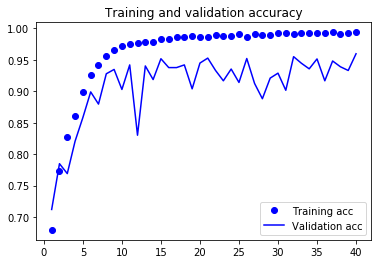

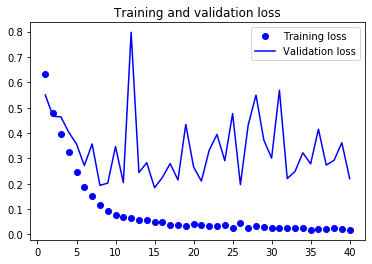

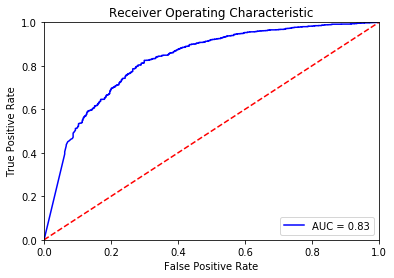

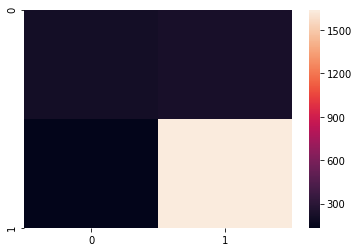

In [ ]:
#trying the same thing as above but with higher resolution images
train_images, test_images, train_labels, test_labels = train_test_split(images1_highres, binary_labels1, test_size = 0.15, random_state = 12)
train_index = [i for i in range(len(train_images))]
ros = RandomOverSampler(random_state=1776)
train_index, train_labels = ros.fit_resample(np.array(train_index).reshape(-1,1), train_labels)
train_images = train_images[train_index.reshape(-1)]
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.15, random_state = 12)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])
epochs = 40
history = model.fit(train_images, train_labels, validation_data = (val_images, val_labels), epochs = epochs)
print('test loss and accuracy:', model.evaluate(test_images, test_labels))
print('loss and accuracy on separate data set:', model.evaluate(images2_highres, binary_labels2))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('first_model_high_res_acc.png')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('first_model_high_res_loss.png')
probs = model.predict_proba(test_images)
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(test_labels, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('first_model_high_res_roc.png')
plt.show()
y_pred = model.predict(test_images)
y_pred = np.array([round(i[0]) for i in y_pred])
cm = sklearn.metrics.confusion_matrix(test_labels, y_pred)
snplot = sn.heatmap(cm, annot=False,xticklabels=[0,1],yticklabels=[0,1])
snplot.get_figure().savefig('first_model_high_res_cm.png')

##This model did better on the test set and much better on the separate data set, so we will continue to use the high resolution images for the rest of the experiments. The trade off is that it took slightly longer to train, but only a little bit longer.

##Next we introduce image augmentation to observe how this effects the model's performance, using the same model architecture as above.

Epoch 1/40
541/540 [==============================] - 24s 43ms/step - loss: 0.7122 - acc: 0.6056 - val_loss: 0.7244 - val_acc: 0.6225
Epoch 2/40
541/540 [==============================] - 22s 41ms/step - loss: 0.5876 - acc: 0.6909 - val_loss: 0.5543 - val_acc: 0.7200
Epoch 3/40
541/540 [==============================] - 23s 42ms/step - loss: 0.5275 - acc: 0.7424 - val_loss: 0.4770 - val_acc: 0.7809
Epoch 4/40
541/540 [==============================] - 23s 42ms/step - loss: 0.5046 - acc: 0.7558 - val_loss: 0.4595 - val_acc: 0.7934
Epoch 5/40
541/540 [==============================] - 22s 41ms/step - loss: 0.4755 - acc: 0.7739 - val_loss: 0.5022 - val_acc: 0.7613
Epoch 6/40
541/540 [==============================] - 22s 42ms/step - loss: 0.4568 - acc: 0.7855 - val_loss: 0.4309 - val_acc: 0.8193
Epoch 7/40
541/540 [==============================] - 23s 42ms/step - loss: 0.4346 - acc: 0.8007 - val_loss: 0.3882 - val_acc: 0.8284
Epoch 8/40
541/540 [==============================] - 23s 42ms

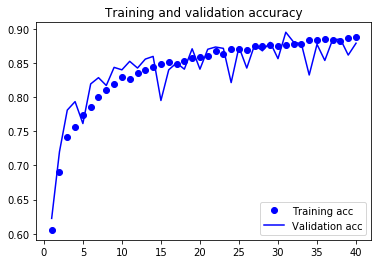

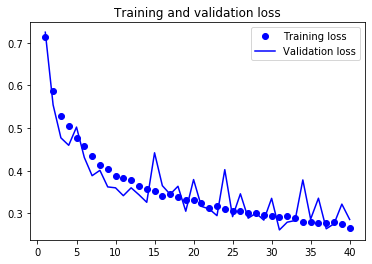

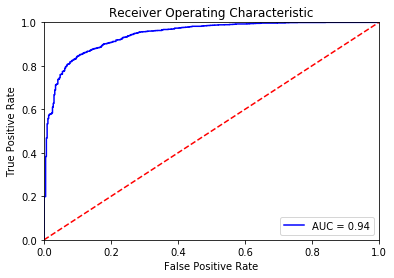

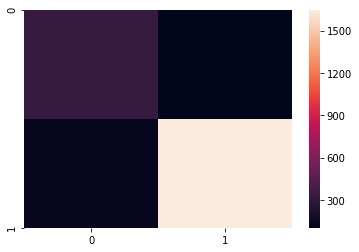

In [ ]:
#same as above but now with image augmentation
train_images, test_images, train_labels, test_labels = train_test_split(images1_highres, binary_labels1, test_size = 0.15, random_state = 12)
train_index = [i for i in range(len(train_images))]
ros = RandomOverSampler(random_state=1776)
train_index, train_labels = ros.fit_resample(np.array(train_index).reshape(-1,1), train_labels)
train_images = train_images[train_index.reshape(-1)]
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.15, random_state = 12)

train_datagen = ImageDataGenerator(
    vertical_flip=True,
    horizontal_flip = True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')
validation_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
train_datagen.fit(train_images)
validation_datagen.fit(val_images)
test_datagen.fit(test_images)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])
epochs = 40
history = model.fit_generator(train_datagen.flow(train_images, train_labels, batch_size=32),
                    steps_per_epoch=len(train_images) / 32, 
                    validation_data = validation_datagen.flow(val_images, val_labels), 
                    epochs=epochs)
print('loss and accuracy on test set:', model.evaluate(test_images, test_labels))
print('loss and accuracy on separate data set:', model.evaluate(images2_highres, binary_labels2))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('simple_model_aug_acc.png')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('simple_model_aug_loss.png')
probs = model.predict_proba(test_images)
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(test_labels, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('simple_model_aug_roc.png')
plt.show()
y_pred = model.predict(test_images)
y_pred = np.array([round(i[0]) for i in y_pred])
cm = sklearn.metrics.confusion_matrix(test_labels, y_pred)
snplot = sn.heatmap(cm, annot=False,xticklabels=[0,1],yticklabels=[0,1])
snplot.get_figure().savefig('simple_model_aug_cm.png')

##Using image augmentation increased model performance on all metrics, with a test set accuracy of 90%, separate data set accuracy of 91%, and ROC AUC of 0.94. This model also did very well on the separate data set.  This is where we will stop fine tuning the basic model.

##Now we turn our attention to transfer learning with the VGG19 model.  For our first attempt, we use the VGG model as a feature extractor and freeze all the weights as the come in the model. We then build a separate simple model of dense layers on top of these features to generate the predictions.

##I used a tutorial to learn about VGG and based a lot of my code on code in the tutorial, the tutorial can be found here: https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
80142336/80134624 [==============================] - 3s 0us/step
Train on 17300 samples, validate on 3054 samples
Epoch 1/40
17300/17300 [==============================] - 3s 151us/sample - loss: 0.6589 - acc: 0.6092 - val_loss: 0.6109 - val_acc: 0.6582
Epoch 2/40
17300/17300 [==============================] - 2s 123us/sample - loss: 0.6070 - acc: 0.6650 - val_loss: 0.5798 - val_acc: 0.6984
Epoch 3/40
17300/17300 [==============================] - 2s 130us/sample - loss: 0.5639 - acc: 0.7055 - val_loss: 0.5396 - val_acc: 0.7302
Epoch 4/40
17300/17300 [==============================] - 2s 120us/sample - loss: 0.5269 - acc: 0.7337 - val_loss: 0.5367 - val_acc: 0.7236
Epoch 5/40
17300/17300 [==============================] - 2s 127us/sample - loss: 0.4823 - acc: 0.7660 - val_loss: 0.4813 - val_acc: 0.7692
Epoch 6/40
17300/17300 [==============================] - 2s 124us/sample - loss: 0.4376 - acc: 0.7945 - 

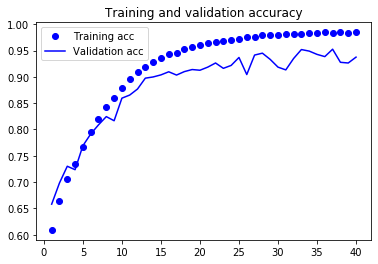

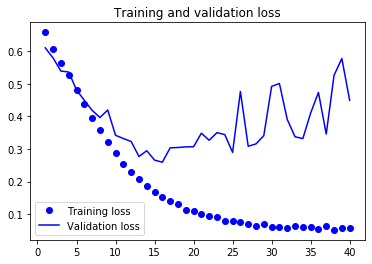

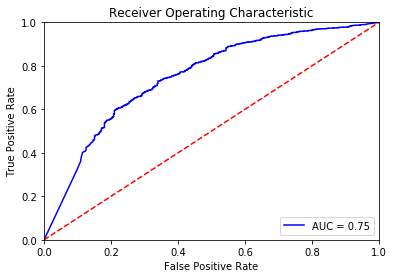

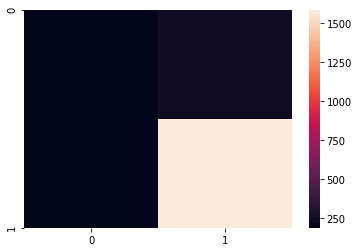

In [ ]:
#same training scheme as above but with VGG19 as the model and no augmentation
train_images, test_images, train_labels, test_labels = train_test_split(images1_highres, binary_labels1, test_size = 0.15, random_state = 12)
train_index = [i for i in range(len(train_images))]
ros = RandomOverSampler(random_state=1776)
train_index, train_labels = ros.fit_resample(np.array(train_index).reshape(-1,1), train_labels)
train_images = train_images[train_index.reshape(-1)]
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.15, random_state = 12)

vgg = keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', 
                                     input_shape=(64,64,3))

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = tf.keras.models.Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
  layer.trainable = False

def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_images)
val_features_vgg = get_bottleneck_features(vgg_model, val_images)
test_features_vgg = get_bottleneck_features(vgg_model, test_images)
images2_highres_features_vgg = get_bottleneck_features(vgg_model, images2_highres)

input_shape = vgg_model.output_shape[1]

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(input_shape,)))
model.add(tf.keras.layers.Dense(512, activation='relu', input_dim=input_shape))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
epochs = 40
history = model.fit(train_features_vgg, train_labels, validation_data = (val_features_vgg, val_labels), epochs = epochs)
print('test loss and accuracy:', model.evaluate(test_features_vgg, test_labels))
print('loss and accuracy on separate data set:', model.evaluate(images2_highres_features_vgg, binary_labels2))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('vgg_acc.png')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('vgg_loss.png')
probs = model.predict_proba(test_features_vgg)
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(test_labels, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('vgg_roc.png')
plt.show()
y_pred = model.predict(test_features_vgg)
y_pred = np.array([round(i[0]) for i in y_pred])
cm = sklearn.metrics.confusion_matrix(test_labels, y_pred)
snplot = sn.heatmap(cm, annot=False,xticklabels=[0,1],yticklabels=[0,1])
snplot.get_figure().savefig('vgg_cm.png')


##This model performed reasonably well, though not as well as the best performing model from scratch. Interestingly, it did very poorly on the separate data set, I am not sure why that is the case. 

##We can see that the validation loss started to increase after the 15th epoch, let's train with only 15 epochs and see what happens

Train on 17300 samples, validate on 3054 samples
Epoch 1/15
17300/17300 [==============================] - 3s 162us/sample - loss: 0.6609 - acc: 0.6104 - val_loss: 0.6160 - val_acc: 0.6490
Epoch 2/15
17300/17300 [==============================] - 2s 130us/sample - loss: 0.6061 - acc: 0.6682 - val_loss: 0.5999 - val_acc: 0.6627
Epoch 3/15
17300/17300 [==============================] - 2s 125us/sample - loss: 0.5661 - acc: 0.7058 - val_loss: 0.5404 - val_acc: 0.7282
Epoch 4/15
17300/17300 [==============================] - 2s 130us/sample - loss: 0.5215 - acc: 0.7351 - val_loss: 0.5186 - val_acc: 0.7407
Epoch 5/15
17300/17300 [==============================] - 2s 131us/sample - loss: 0.4760 - acc: 0.7739 - val_loss: 0.4904 - val_acc: 0.7574
Epoch 6/15
17300/17300 [==============================] - 2s 125us/sample - loss: 0.4343 - acc: 0.7966 - val_loss: 0.4497 - val_acc: 0.7878
Epoch 7/15
17300/17300 [==============================] - 2s 128us/sample - loss: 0.3883 - acc: 0.8254 - val_lo

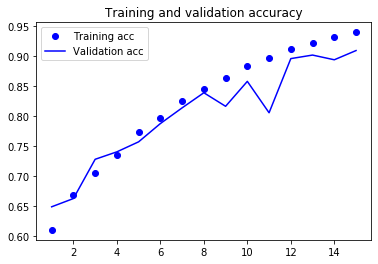

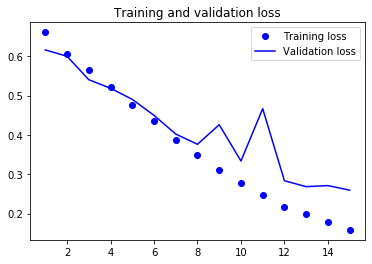

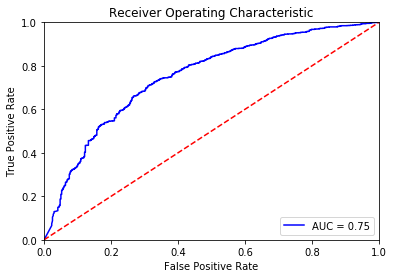

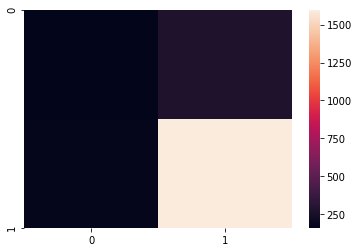

In [ ]:
#same training scheme as above but with VGG19 as the model and no augmentation
train_images, test_images, train_labels, test_labels = train_test_split(images1_highres, binary_labels1, test_size = 0.15, random_state = 12)
train_index = [i for i in range(len(train_images))]
ros = RandomOverSampler(random_state=1776)
train_index, train_labels = ros.fit_resample(np.array(train_index).reshape(-1,1), train_labels)
train_images = train_images[train_index.reshape(-1)]
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.15, random_state = 12)

vgg = keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', 
                                     input_shape=(64,64,3))

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = tf.keras.models.Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
  layer.trainable = False

def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_images)
val_features_vgg = get_bottleneck_features(vgg_model, val_images)
test_features_vgg = get_bottleneck_features(vgg_model, test_images)
images2_highres_features_vgg = get_bottleneck_features(vgg_model, images2_highres)

input_shape = vgg_model.output_shape[1]

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(input_shape,)))
model.add(tf.keras.layers.Dense(512, activation='relu', input_dim=input_shape))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
epochs = 15
history = model.fit(train_features_vgg, train_labels, validation_data = (val_features_vgg, val_labels), epochs = epochs)
print('test loss and accuracy:', model.evaluate(test_features_vgg, test_labels))
print('loss and accuracy on separate data set:', model.evaluate(images2_highres_features_vgg, binary_labels2))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('vgg_acc.png')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('vgg_loss.png')
probs = model.predict_proba(test_features_vgg)
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(test_labels, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('vgg_roc.png')
plt.show()
y_pred = model.predict(test_features_vgg)
y_pred = np.array([round(i[0]) for i in y_pred])
cm = sklearn.metrics.confusion_matrix(test_labels, y_pred)
snplot = sn.heatmap(cm, annot=False,xticklabels=[0,1],yticklabels=[0,1])
snplot.get_figure().savefig('vgg_cm.png')


##Training for 15 epochs did not train much.  Let's introduce augmentation to the same model and observe the results.

Epoch 1/40
100/100 [==============================] - 9s 86ms/step - loss: 0.7202 - acc: 0.5124 - val_loss: 0.6916 - val_acc: 0.5330
Epoch 2/40
100/100 [==============================] - 5s 48ms/step - loss: 0.7121 - acc: 0.4907 - val_loss: 0.6932 - val_acc: 0.5130
Epoch 3/40
100/100 [==============================] - 5s 47ms/step - loss: 0.6971 - acc: 0.4993 - val_loss: 0.6932 - val_acc: 0.4870
Epoch 4/40
100/100 [==============================] - 5s 48ms/step - loss: 0.7015 - acc: 0.4860 - val_loss: 0.6931 - val_acc: 0.4870
Epoch 5/40
100/100 [==============================] - 5s 49ms/step - loss: 0.6960 - acc: 0.5210 - val_loss: 0.7100 - val_acc: 0.4870
Epoch 6/40
100/100 [==============================] - 5s 48ms/step - loss: 0.6942 - acc: 0.5240 - val_loss: 0.7369 - val_acc: 0.4940
Epoch 7/40
100/100 [==============================] - 5s 48ms/step - loss: 0.6092 - acc: 0.6853 - val_loss: 0.5504 - val_acc: 0.7330
Epoch 8/40
100/100 [==============================] - 5s 47ms/step - 

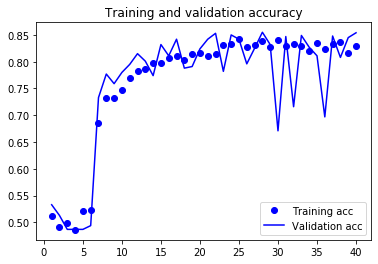

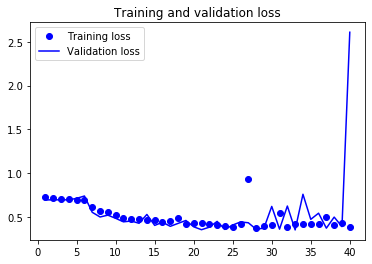

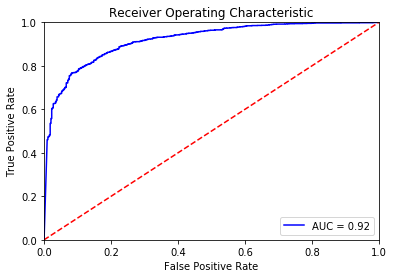

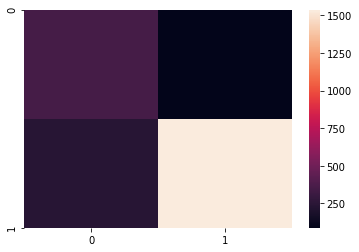

In [ ]:
#vgg model like above but with image augmentation
train_index = [i for i in range(len(train_images))]
ros = RandomOverSampler(random_state=1776)
train_index, train_labels = ros.fit_resample(np.array(train_index).reshape(-1,1), train_labels)
train_images = train_images[train_index.reshape(-1)]
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.15, random_state = 12)

train_datagen = ImageDataGenerator(
    vertical_flip=True,
    horizontal_flip = True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')
validation_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
train_datagen.fit(train_images)
validation_datagen.fit(val_images)
test_datagen.fit(test_images)

train_generator = train_datagen.flow(train_images, train_labels, batch_size=30)
val_generator = validation_datagen.flow(val_images, val_labels, batch_size=20)

vgg = keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', 
                                     input_shape=(64,64,3))

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = tf.keras.models.Model(vgg.input, output)

model = tf.keras.models.Sequential()
model.add(vgg_model)
model.add(tf.keras.layers.Dense(512, activation='relu', input_dim=vgg_model.output_shape[1]))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=40,
                              validation_data=val_generator, validation_steps=50, 
verbose=1) 
print('test loss and accuracy:', model.evaluate(test_images, test_labels))
print('loss and accuracy on separate data set:', model.evaluate(images2_highres, binary_labels2))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('vgg_acc.png')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('vgg_loss.png')
probs = model.predict_proba(test_images)
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(test_labels, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('vgg_roc.png')
plt.show()
y_pred = model.predict(test_images)
y_pred = np.array([round(i[0]) for i in y_pred])
cm = sklearn.metrics.confusion_matrix(test_labels, y_pred)
snplot = sn.heatmap(cm, annot=False,xticklabels=[0,1],yticklabels=[0,1])
snplot.get_figure().savefig('vgg_cm.png')

##This model is comparable to the best performing scratch model, though slightly worse in each metric.  Notice that we got a bit unlucky and had a large jump in validation loss right before we finished training, so this may indicate that the model jumped out of the minimum.  This could be a sign that we have our learning rate set too high.  It may be worth rerunning this model or changing the learning rate.

##Next we will actually train some of the convolution layers of the VGG model instead of freezing them and using them as feature extractors.  The first two batches of convolutional layers will remain frozen, the last two batches will be trained through backpropagation along with the rest of the model.

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f09010a84e0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08fe6cfcc0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0934252a90> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f08fe6d3978> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08fe6e1588> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08fe6ec518> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f08fe67bb00> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08fe685710> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08fe688668> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08fe69bc88> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08fe6ab2e8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 

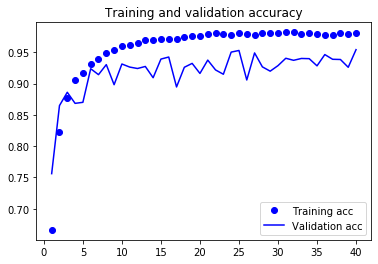

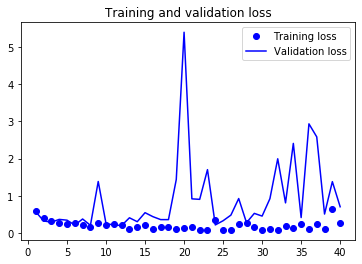

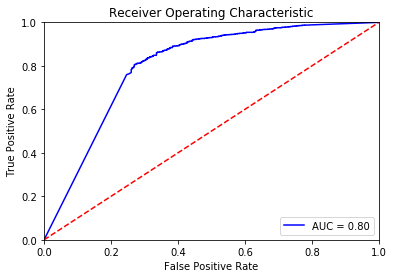

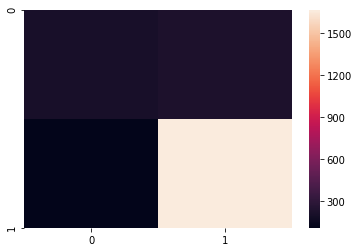

In [ ]:
#same training scheme but retraining the weights in the last convolution layers of VGG model and not using augmentation
train_images, test_images, train_labels, test_labels = train_test_split(images1_highres, binary_labels1, test_size = 0.15, random_state = 12)
train_index = [i for i in range(len(train_images))]
ros = RandomOverSampler(random_state=1776)
train_index, train_labels = ros.fit_resample(np.array(train_index).reshape(-1,1), train_labels)
train_images = train_images[train_index.reshape(-1)]
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.15, random_state = 12)

# train_datagen = ImageDataGenerator(
#     vertical_flip=True,
#     horizontal_flip = True,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     zoom_range=0.2,
#     fill_mode='nearest')
# validation_datagen = ImageDataGenerator()
# test_datagen = ImageDataGenerator()
# train_datagen.fit(train_images)
# validation_datagen.fit(val_images)
# test_datagen.fit(test_images)

# train_generator = train_datagen.flow(train_images, train_labels, batch_size=30)
# val_generator = validation_datagen.flow(val_images, val_labels, batch_size=20)

vgg_model = keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', 
                                     input_shape=(64,64,3))

vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

for layer in vgg_model.layers:
    print(layer, layer.trainable)

# input_shape = vgg_model.output_shape[1]

model = tf.keras.models.Sequential()
model.add(vgg_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu', input_dim=vgg_model.output_shape[1]))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
              
history = model.fit(train_images, train_labels, validation_data = (val_images, val_labels), epochs = 40)
print('test set loss and accuracy:', model.evaluate(test_images, test_labels))
print('loss and accuracy on separate data set:', model.evaluate(images2_highres, binary_labels2))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('vgg_model_trained_acc.png')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('vgg_model_trianed_loss.png')
probs = model.predict_proba(test_images)
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(test_labels, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('vgg_model_trained_roc.png')
plt.show()
y_pred = model.predict(test_images)
y_pred = np.array([round(i[0]) for i in y_pred])
cm = sklearn.metrics.confusion_matrix(test_labels, y_pred)
snplot = sn.heatmap(cm, annot=False,xticklabels=[0,1],yticklabels=[0,1])
snplot.get_figure().savefig('vgg_model_trained_cm.png')

##The model didn't do quite as well, and again performed poorly on the separate data set. However this model did not have augmentation, so let's introduce augmentation. It is also worth noticing that augmentation appears to make a difference on how the model does on the separate data set.

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f09010a85c0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f09010a8710> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f09010a8dd8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f090105b4a8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f090106efd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f090105f048> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f090105d668> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f090105d6a0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0901052208> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0900ffe860> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f090100aeb8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 

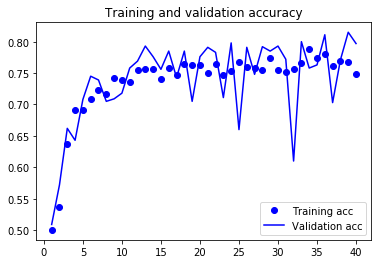

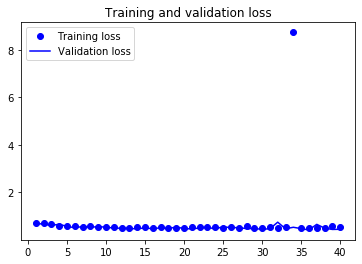

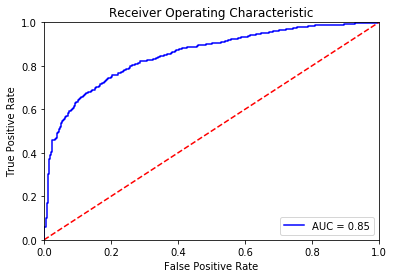

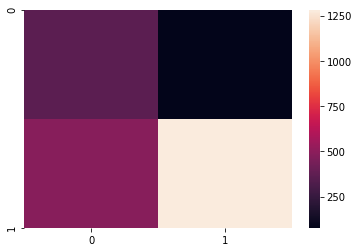

In [ ]:
#same training scheme but retraining the weights in the last convolution layers of VGG model and using augmentation
train_images, test_images, train_labels, test_labels = train_test_split(images1_highres, binary_labels1, test_size = 0.15, random_state = 12)
train_index = [i for i in range(len(train_images))]
ros = RandomOverSampler(random_state=1776)
train_index, train_labels = ros.fit_resample(np.array(train_index).reshape(-1,1), train_labels)
train_images = train_images[train_index.reshape(-1)]
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.15, random_state = 12)

train_datagen = ImageDataGenerator(
    vertical_flip=True,
    horizontal_flip = True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')
validation_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
train_datagen.fit(train_images)
validation_datagen.fit(val_images)
test_datagen.fit(test_images)

train_generator = train_datagen.flow(train_images, train_labels, batch_size=30)
val_generator = validation_datagen.flow(val_images, val_labels, batch_size=20)

vgg_model = keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', 
                                     input_shape=(64,64,3))

vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

for layer in vgg_model.layers:
    print(layer, layer.trainable)

# input_shape = vgg_model.output_shape[1]

model = tf.keras.models.Sequential()
model.add(vgg_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu', input_dim=vgg_model.output_shape[1]))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=40,
                              validation_data=val_generator, validation_steps=50) 
print('test loss and accuracy:', model.evaluate(test_images, test_labels))
print('loss and accuracy on separate data set:', model.evaluate(images2_highres, binary_labels2))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('vgg_retrain_aug_acc.png')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('vgg_retrain_aug_loss.png')
probs = model.predict_proba(test_images)
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(test_labels, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('vgg_retrain_aug_roc.png')
plt.show()
y_pred = model.predict(test_images)
y_pred = np.array([round(i[0]) for i in y_pred])
cm = sklearn.metrics.confusion_matrix(test_labels, y_pred)
snplot = sn.heatmap(cm, annot=False,xticklabels=[0,1],yticklabels=[0,1])
snplot.get_figure().savefig('vgg_retrain_aug_cm.png')

##The retrained VGG model with augmentation performed reasonably well, though I was hoping for a bit more. The model trained from scratch remains the best performer.

(1, 64, 64, 3)


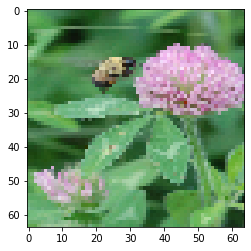

(1, 64, 64, 96)


ValueError: ignored

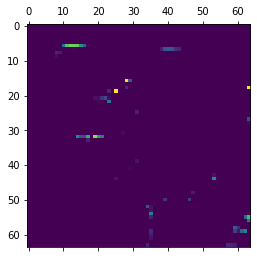

In [ ]:
# img = test_images[43]
# img_tensor = np.expand_dims(img, axis=0)
# print(img_tensor.shape)
# plt.imshow(img_tensor[0])
# plt.show()

# layer_outputs = [layer.output for layer in model.layers[:6]]
# activation_model = tf.keras.models.Model(inputs=model.input, outputs=model.layers[0].output)
# activations = activation_model.predict(img_tensor)
# first_layer_activation = np.array([activations[0]])
# print(first_layer_activation.shape)
# plt.matshow(first_layer_activation[0, :, :, 6], cmap='viridis')

# layer_names = []
# for layer in model.layers[:10]:
#     layer_names.append(layer.name)

# images_per_row = 16

# for layer_name, layer_activation in zip(layer_names, activations):
#     n_features = layer_activation.shape[-1]
#     size = layer_activation.shape[1]
#     n_cols = n_features // images_per_row
#     display_grid = np.zeros((size * n_cols, images_per_row * size))
#     for col in range(n_cols):
#         for row in range(images_per_row):
#             channel_image = layer_activation[0,:, :]
#             channel_image -= channel_image.mean()
#             channel_image /= channel_image.std()
#             channel_image *= 64
#             channel_image += 128
#             channel_image = np.clip(channel_image, 0, 255).astype('uint8')
#             display_grid[col * size : (col + 1) * size,
#                          row * size : (row + 1) * size] = channel_image
#     scale = 1. / size
#     plt.figure(figsize=(scale * display_grid.shape[1],
#                         scale * display_grid.shape[0]))
#     plt.title(layer_name)
#     plt.grid(False)
#     plt.imshow(display_grid, aspect='auto', cmap='viridis')

##Now we return to training a model from scratch, but we expand our convolutional layers to mimic the architecture of other CNNs that perform well on images.

Epoch 1/40
541/540 [==============================] - 29s 54ms/step - loss: 0.6850 - acc: 0.5649 - val_loss: 0.7152 - val_acc: 0.4908
Epoch 2/40
541/540 [==============================] - 25s 46ms/step - loss: 0.6293 - acc: 0.6500 - val_loss: 0.8596 - val_acc: 0.5062
Epoch 3/40
541/540 [==============================] - 25s 46ms/step - loss: 0.5492 - acc: 0.7242 - val_loss: 0.8133 - val_acc: 0.6316
Epoch 4/40
541/540 [==============================] - 25s 46ms/step - loss: 0.4997 - acc: 0.7588 - val_loss: 0.8692 - val_acc: 0.5845
Epoch 5/40
541/540 [==============================] - 25s 46ms/step - loss: 0.4715 - acc: 0.7828 - val_loss: 0.5583 - val_acc: 0.7469
Epoch 6/40
541/540 [==============================] - 25s 45ms/step - loss: 0.4402 - acc: 0.7971 - val_loss: 2.3318 - val_acc: 0.4944
Epoch 7/40
541/540 [==============================] - 25s 46ms/step - loss: 0.4205 - acc: 0.8099 - val_loss: 0.9935 - val_acc: 0.6673
Epoch 8/40
541/540 [==============================] - 25s 46ms

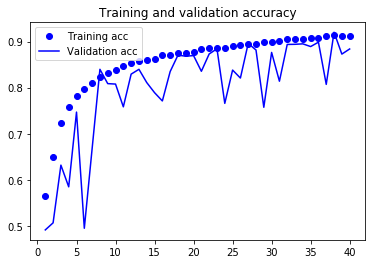

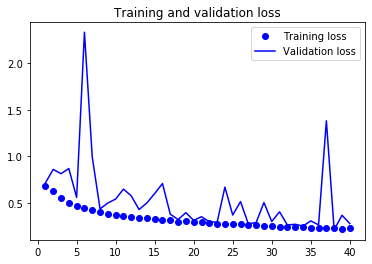

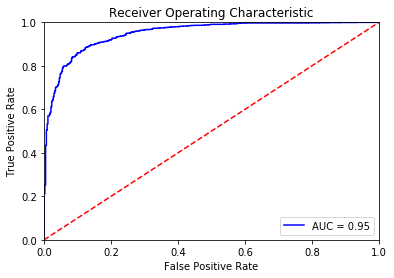

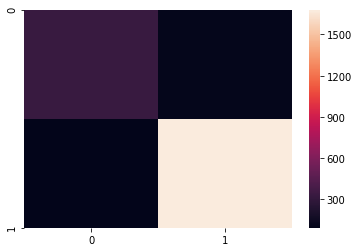

In [ ]:
#emily's convolution layers
train_images, test_images, train_labels, test_labels = train_test_split(images1_highres, binary_labels1, test_size = 0.15, random_state = 12)
train_index = [i for i in range(len(train_images))]
ros = RandomOverSampler(random_state=1776)
train_index, train_labels = ros.fit_resample(np.array(train_index).reshape(-1,1), train_labels)
train_images = train_images[train_index.reshape(-1)]
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.15, random_state = 12)

train_datagen = ImageDataGenerator(
    vertical_flip=True,
    horizontal_flip = True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')
validation_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
train_datagen.fit(train_images)
validation_datagen.fit(val_images)
test_datagen.fit(test_images)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(96, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Conv2D(96, (3, 3), activation='relu', padding = 'same'))
model.add(tf.keras.layers.Conv2D(96, (3, 3), activation='relu', padding = 'same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides = 2))
model.add(tf.keras.layers.Conv2D(192, (3, 3), activation='relu', padding = 'same'))
model.add(tf.keras.layers.Conv2D(192, (3, 3), activation='relu', padding = 'same'))
model.add(tf.keras.layers.Conv2D(192, (3, 3), activation='relu', padding = 'same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides = 2))
model.add(tf.keras.layers.Conv2D(192, (3, 3), activation='relu', padding = 'same'))
model.add(tf.keras.layers.Conv2D(192, (1, 1), activation='relu'))
model.add(tf.keras.layers.Conv2D(16, (1, 1)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
epochs = 40
history = model.fit_generator(train_datagen.flow(train_images, train_labels, batch_size=32),
                    steps_per_epoch=len(train_images) / 32, 
                    validation_data = validation_datagen.flow(val_images, val_labels), 
                    epochs=epochs)
print('loss and accuracy on test set:', model.evaluate(test_images, test_labels))
print('loss and accuracy on separate data set:', model.evaluate(images2_highres, binary_labels2))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('more_conv_acc.png')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('more_conv_loss.png')
probs = model.predict_proba(test_images)
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(test_labels, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('more_conv_roc.png')
plt.show()
y_pred = model.predict(test_images)
y_pred = np.array([round(i[0]) for i in y_pred])
cm = sklearn.metrics.confusion_matrix(test_labels, y_pred)
snplot = sn.heatmap(cm, annot=False,xticklabels=[0,1],yticklabels=[0,1])
snplot.get_figure().savefig('more_conv_cm.png')

##This model had a very slight improvement on test accuracy and ROC AUC, but did much worse on the separate data set, suggesting that the extra convolutional layers maybe overfit the data set.  This model could maybe be adapted further to fix this problem, but for now we will prefer the previous scratch model.

##Now we turn to a different training regime.  Instead of using the separate data set to test how the model generalizes, we combine the data sets to give our model more data to train on.  We use the best performing model, the built from scratch model, with image augmentation.

Epoch 1/40
541/540 [==============================] - 25s 47ms/step - loss: 0.5012 - acc: 0.7647 - val_loss: 0.5160 - val_acc: 0.7092
Epoch 2/40
541/540 [==============================] - 22s 41ms/step - loss: 0.3996 - acc: 0.8090 - val_loss: 0.4394 - val_acc: 0.8026
Epoch 3/40
541/540 [==============================] - 23s 42ms/step - loss: 0.3687 - acc: 0.8181 - val_loss: 0.3177 - val_acc: 0.8477
Epoch 4/40
541/540 [==============================] - 23s 42ms/step - loss: 0.3440 - acc: 0.8317 - val_loss: 0.3274 - val_acc: 0.8474
Epoch 5/40
541/540 [==============================] - 23s 42ms/step - loss: 0.3400 - acc: 0.8335 - val_loss: 0.2928 - val_acc: 0.8644
Epoch 6/40
541/540 [==============================] - 23s 42ms/step - loss: 0.3243 - acc: 0.8377 - val_loss: 0.3055 - val_acc: 0.8507
Epoch 7/40
541/540 [==============================] - 23s 42ms/step - loss: 0.3224 - acc: 0.8458 - val_loss: 0.3276 - val_acc: 0.8566
Epoch 8/40
541/540 [==============================] - 23s 42ms

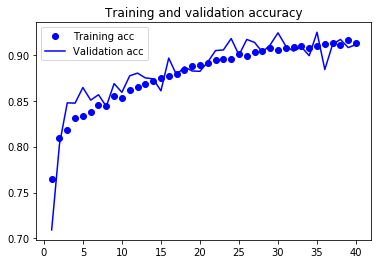

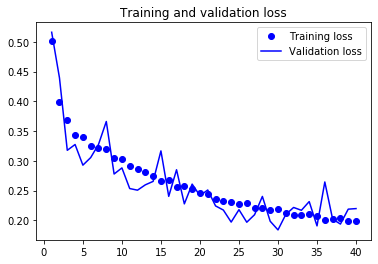

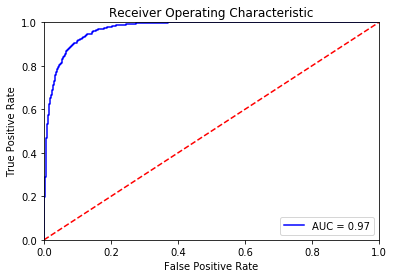

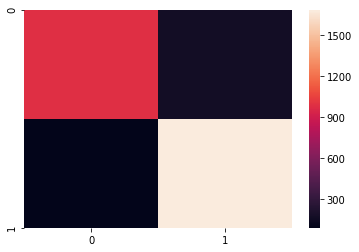

In [ ]:
#using the best model and combining the data set
images = np.concatenate((images1_highres, images2_highres), axis=0)
labels = np.concatenate((binary_labels1, binary_labels2), axis=0)
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.15, random_state = 12)
train_index = [i for i in range(len(train_images))]
ros = RandomOverSampler(random_state=1776)
train_index, train_labels = ros.fit_resample(np.array(train_index).reshape(-1,1), train_labels)
train_images = train_images[train_index.reshape(-1)]
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.15, random_state = 12)

train_datagen = ImageDataGenerator(
    vertical_flip=True,
    horizontal_flip = True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')
validation_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
train_datagen.fit(train_images)
validation_datagen.fit(val_images)
test_datagen.fit(test_images)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])
epochs = 40
history = model.fit_generator(train_datagen.flow(train_images, train_labels, batch_size=32),
                    steps_per_epoch=len(train_images) / 32, 
                    validation_data = validation_datagen.flow(val_images, val_labels), 
                    epochs=epochs)
print('loss and accuracy on test set:', model.evaluate(test_images, test_labels))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('combined_model_acc.png')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('combined_model_loss.png')
probs = model.predict_proba(test_images)
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(test_labels, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('combined_model_roc.png')
plt.show()
y_pred = model.predict(test_images)
y_pred = np.array([round(i[0]) for i in y_pred])
cm = sklearn.metrics.confusion_matrix(test_labels, y_pred)
snplot = sn.heatmap(cm, annot=False,xticklabels=[0,1],yticklabels=[0,1])
snplot.get_figure().savefig('combined_model_cm.png')

##Test set accuracy of 91% and ROC AUC of 0.97 feels like a win, we are happy with that performance

##We will also train the best VGG model on the combined data set to see if it performs better.

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f08ff717d30> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08ff699048> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08ff699ac8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f08ff0e9eb8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08ff076ac8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08ff07ba58> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f08ff08e0f0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08ff0959e8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08ff09bc50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08ff0ad2e8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f08ff039940> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 

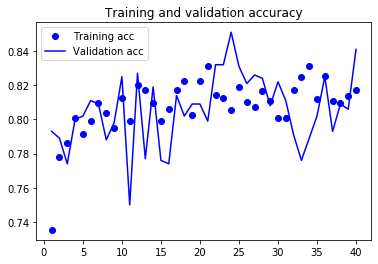

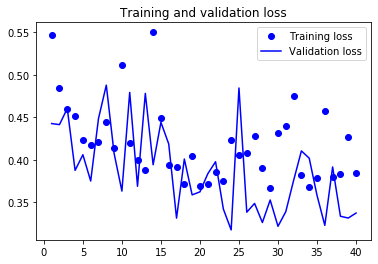

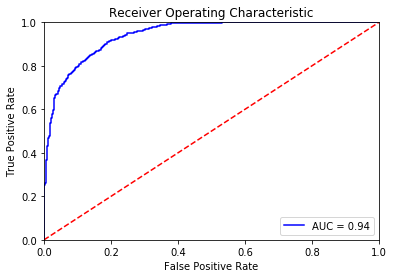

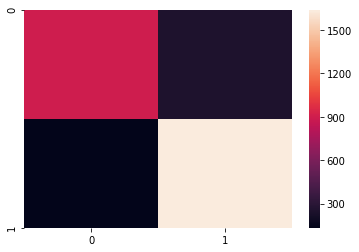

In [ ]:
#vgg19 model with combined data

train_datagen = ImageDataGenerator(
    vertical_flip=True,
    horizontal_flip = True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')
validation_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
train_datagen.fit(train_images)
validation_datagen.fit(val_images)
test_datagen.fit(test_images)

train_generator = train_datagen.flow(train_images, train_labels, batch_size=30)
val_generator = validation_datagen.flow(val_images, val_labels, batch_size=20)

vgg_model = keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', 
                                     input_shape=(64,64,3))

vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

for layer in vgg_model.layers:
    print(layer, layer.trainable)

# input_shape = vgg_model.output_shape[1]

model = tf.keras.models.Sequential()
model.add(vgg_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu', input_dim=vgg_model.output_shape[1]))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=40,
                              validation_data=val_generator, validation_steps=50) 
print('test loss and accuracy:', model.evaluate(test_images, test_labels))
print('loss and accuracy on separate data set:', model.evaluate(images2_highres, binary_labels2))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('vgg_combined_acc.png')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('vgg_combined_loss.png')
probs = model.predict_proba(test_images)
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(test_labels, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('vgg_combined_roc.png')
plt.show()
y_pred = model.predict(test_images)
y_pred = np.array([round(i[0]) for i in y_pred])
cm = sklearn.metrics.confusion_matrix(test_labels, y_pred)
snplot = sn.heatmap(cm, annot=False,xticklabels=[0,1],yticklabels=[0,1])
snplot.get_figure().savefig('vgg_combined_cm.png')

##Again, the transfer learning model does well, but not as well as the built from scratch model (ignore the separate test set line, that was left in on accident)
##We were able to train a model with good performance on the binary classification task. The models built from scratch were able to slightly outperform the adapted transfer learning models.  The experiments also highlight the importance of data augmentation for models to generalize well.

